In [1525]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [1526]:
train=pd.read_csv('train.csv',index_col='ID')
test=pd.read_csv('test.csv',index_col='ID')

In [1527]:
train_shape=train.shape[0]
test_shape=test.shape[0]

In [1528]:
train=shuffle(train)

In [1529]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [1530]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
FDI40OUT017,11.50,Regular,0.126313,Frozen Foods,100.6358,2007,NaN,Tier 2,Supermarket Type1,2010.7160
FDH34OUT017,8.63,Low Fat,0.031271,Snack Foods,186.0582,2007,NaN,Tier 2,Supermarket Type1,3900.9222
FDH09OUT035,12.60,Low Fat,0.056067,Seafood,50.7982,2004,Small,Tier 2,Supermarket Type1,473.3838
NCP06OUT049,20.70,Low Fat,0.039307,Household,150.7366,1999,Medium,Tier 1,Supermarket Type1,3325.0052
NCA05OUT013,20.75,Low Fat,0.000000,Health and Hygiene,149.4734,1987,High,Tier 3,Supermarket Type1,2969.4680


In [1531]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
FDW14OUT017,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
NCN55OUT010,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
FDQ58OUT017,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
FDY38OUT027,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [1532]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [1533]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [1534]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [1535]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [1536]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [1537]:
cleanup_nums={'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF': 2,'reg':3,'low fat':4},'Item_Type':{'Fruits and Vegetables':1,'Snack Foods':2
,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,
'Others':0,'Starchy Foods':13 ,'Breakfast':14 ,'Seafood':15 },'Outlet_Size':{'Medium':1,'Small':0,'High':2},'Outlet_Location_Type':{'Tier 3':2
,'Tier 2':1,'Tier 1':0},'Outlet_Type':{'Supermarket Type1':1,'Grocery Store':0,'Supermarket Type3':3,'Supermarket Type2':2}}

In [1538]:
train.replace(cleanup_nums, inplace=True)

In [1539]:
test.replace(cleanup_nums, inplace=True)

In [1540]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
ID,,,,,,,,,,
FDI40OUT017,11.50,1,0.126313,4,100.6358,2007,NaN,1,1,2010.7160
FDH34OUT017,8.63,0,0.031271,2,186.0582,2007,NaN,1,1,3900.9222
FDH09OUT035,12.60,0,0.056067,15,50.7982,2004,0.0,1,1,473.3838
NCP06OUT049,20.70,0,0.039307,3,150.7366,1999,1.0,0,1,3325.0052
NCA05OUT013,20.75,0,0.000000,8,149.4734,1987,2.0,2,1,2969.4680


In [1541]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
ID,,,,,,,,,
FDW58OUT049,20.750,0,0.007565,2,107.8622,1999,1.0,0,1
FDW14OUT017,8.300,3,0.038428,5,87.3198,2007,NaN,1,1
NCN55OUT010,14.600,0,0.099575,0,241.7538,1998,NaN,2,0
FDQ58OUT017,7.315,0,0.015388,2,155.0340,2007,NaN,1,1
FDY38OUT027,NaN,1,0.118599,5,234.2300,1985,1.0,2,3


{'boxes': [<matplotlib.lines.Line2D at 0x1fa801ff400>],
 'caps': [<matplotlib.lines.Line2D at 0x1fa801fff28>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fa80209c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1fa80209828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1fa801ff588>,
  <matplotlib.lines.Line2D at 0x1fa801ffac8>]}

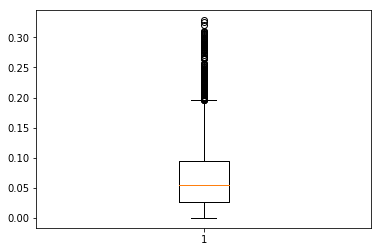

In [1542]:
plt.boxplot(train['Item_Visibility'])

In [1543]:
train.loc[train['Item_Visibility']>0.25,'Item_Visibility']=np.mean(train['Item_Visibility'])

{'boxes': [<matplotlib.lines.Line2D at 0x1fa8025e828>],
 'caps': [<matplotlib.lines.Line2D at 0x1fa80266390>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fa802700f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1fa80266c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1fa8025e9b0>,
  <matplotlib.lines.Line2D at 0x1fa8025eef0>]}

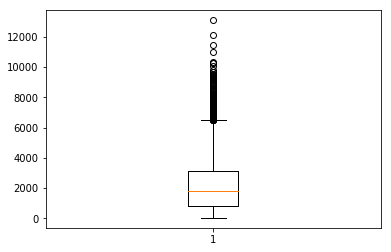

In [1544]:
plt.boxplot(train['Item_Outlet_Sales'])

In [1545]:
train.loc[train['Item_Outlet_Sales']>10000,'Item_Outlet_Sales']=np.mean(train['Item_Outlet_Sales'])

In [1546]:
train.columns[train.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [1547]:
test.columns[test.isna().any()].tolist()

['Item_Weight', 'Outlet_Size']

In [1548]:
train['Outlet_Size']=train['Outlet_Size'].ffill().bfill()
train['Item_Weight'].fillna(np.mean(train['Item_Weight']),inplace=True)

In [1549]:
train.columns[train.isna().any()].tolist()

[]

In [1550]:
test['Outlet_Size']=test['Outlet_Size'].ffill().bfill()
test['Item_Weight'].fillna(np.mean(test['Item_Weight']),inplace=True)

In [1551]:
test.columns[test.isna().any()].tolist()

[]

In [1552]:
x_train=train.drop(['Item_Fat_Content', 'Item_Outlet_Sales'],axis=1)

In [1553]:
y_train=train['Item_Outlet_Sales']

In [1554]:
from sklearn.tree import DecisionTreeRegressor

In [1555]:
reg=DecisionTreeRegressor(min_samples_split=150,min_samples_leaf=20,splitter='random')

In [1556]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=20,
           min_samples_split=150, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random')

In [1557]:
reg.score(x_train,y_train)

0.60580307738031058

In [1558]:
test=test.drop(['Item_Fat_Content'],axis=1)

In [1559]:
pred=reg.predict(test)

In [1560]:
results={'ID':test.index,'Item_Outlet_Sales':pred}

In [1561]:
output=pd.DataFrame(results)

In [1562]:
output.to_csv('output.csv',index=False)